# Исследование доходности ставок в РПЛ

**Цель исследования** - Оценка потенциального выигрыша в ставках на матчи РПЛ, а также возможные пути повышения эффективности выбора ставок.
  
**Основные гипотезы**
1. Большинство матчей заканчивается с 2-мя или более забитыми мячами, следовательно ставки "Тотал больше 1.5" и "Тотал больше 2.5" выгодны.
1. Если ставить только на матчи определенных команд, вероятность выигрыша повысится.
    
**Исходные данные**
  
* Результаты всех матчей сезона РПЛ 2021/22
* Список коэффициентов ставок ТБ 1.5 и ТБ 2.5

**Ход исследования**   
  
1. Оценить возможный доход от ставок**  
2. Найти способы повысить эффективность выбора ставок**

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_excel ('rpl_2021.xlsx') 
print(df.columns)

Index(['round', 'date', 'time', 'host_team', 'away_team', 'host_score',
       'away_score'],
      dtype='object')


## 1. Исходные данные

В таблице результаты 240 матчей РПЛ сезона 2021/22

Названия столбцов: 
  
`round` - номер тура  
`date` - дата матча  
`time` - время начала матча  
`host_team` - название команды хозяев  
`away_team` - название команды гостей  
`host_score` - счет команды хозяев  
`away_score` - счет команды гостей  

Списки коэффициентов на ставки "ТБ 1.5" и "ТБ 2.5" получены из прогнозов на матчи РПЛ сезона 2022/23.  
В расчетах используется среднее значение.

In [10]:
coeff_1_5 = [1.32, 1.2, 1.24, 1.24, 1.31, 1.26, 1.27, 1.24, 1.23, 1.26, 1.2, 1.2, 1.21, 1.2, 1.22, 1.26, 1.4, 1.17, 1.23, 1.24, 1.21, 1.27, 1.44, 1.25, 1.2, 1.21, 1.3, 1.25, 1.2]
coeff_2_5 = [1.92, 1.85, 1.71, 1.88, 1.64, 1.63, 1.68, 1.7, 1.73, 1.86, 2.26, 1.58, 1.76, 1.82, 1.7, 1.87, 2.13, 1.81, 1.65, 1.69, 1.99, 1.82, 1.65]

coeff_1_5_avg = sum(coeff_1_5)/len(coeff_1_5)
coeff_2_5_avg = sum(coeff_2_5)/len(coeff_2_5)

print(round(coeff_1_5_avg,3))
print(round(coeff_2_5_avg,3))

1.249
1.797


## 1.1. Предобработка данных

In [ ]:
необходимо проверить названия команд

In [54]:
host_teams = df['host_team'].unique()
host_teams

array(['Ростов\xa0', 'Химки\xa0', 'Локомотив М\xa0', 'Рубин\xa0',
       'Урал\xa0', 'Крылья Советов\xa0', 'ЦСКА\xa0',
       'Нижний Новгород\xa0', 'Арсенал\xa0', 'Уфа\xa0', 'Краснодар\xa0',
       'Ахмат\xa0', 'Зенит\xa0', 'Спартак М\xa0', 'Динамо М\xa0',
       'Сочи\xa0'], dtype=object)

In [56]:
away_teams = df['away_team'].unique()
away_teams

array(['\xa0Динамо М', '\xa0Зенит', '\xa0Арсенал', '\xa0Спартак М',
       '\xa0Краснодар', '\xa0Ахмат', '\xa0Уфа', '\xa0Сочи', '\xa0Рубин',
       '\xa0Локомотив М', '\xa0Нижний Новгород', '\xa0Химки',
       '\xa0Крылья Советов', '\xa0Ростов', '\xa0ЦСКА', '\xa0Урал'],
      dtype=object)

Исправление названий (удаление пробелов)

In [94]:
teams = ['host_team', 'away_team']

for team in teams:
    for index in range(len(df['host_team'])):
        df[team][index] = df[team][index].replace('\xa0', '')
    
    
print(df['host_team'].unique())
print(df['away_team'].unique())

['Ростов' 'Химки' 'Локомотив М' 'Рубин' 'Урал' 'Крылья Советов' 'ЦСКА'
 'Нижний Новгород' 'Арсенал' 'Уфа' 'Краснодар' 'Ахмат' 'Зенит' 'Спартак М'
 'Динамо М' 'Сочи']
['Динамо М' 'Зенит' 'Арсенал' 'Спартак М' 'Краснодар' 'Ахмат' 'Уфа' 'Сочи'
 'Рубин' 'Локомотив М' 'Нижний Новгород' 'Химки' 'Крылья Советов' 'Ростов'
 'ЦСКА' 'Урал']


Названия команд исправлены.

## 2. Общие расчеты

### 2.1. Количество голов в каждом матче

К датафрейму добавляется столбец `total_score` с информацией о сумме забитых голов в матче

In [4]:
df['total_score'] = df['host_score'] + df['away_score']

df

,round,date,time,host_team,away_team,host_score,away_score,total_score
0,1,2021-07-23,20:00,Ростов,Динамо М,0,2,2
1,1,2021-07-24,17:30,Химки,Зенит,1,3,4
2,1,2021-07-24,20:00,Локомотив М,Арсенал,3,1,4
3,1,2021-07-24,20:00,Рубин,Спартак М,1,0,1
4,1,2021-07-25,17:30,Урал,Краснодар,0,3,3
...,...,...,...,...,...,...,...,...
235,30,2022-05-21,17:00,Рубин,Уфа,1,2,3
236,30,2022-05-21,17:00,Крылья Советов,Локомотив М,0,1,1
237,30,2022-05-21,17:00,Динамо М,Сочи,1,5,6
238,30,2022-05-21,17:00,Краснодар,Ахмат,1,1,2


### 2.2. Подсчет выигрышей

Функция `bet_win` проводит проверку, "зашла" ставка или нет

In [11]:
def bet_win (score, bet):
    if score > bet:
        return 1
    else:
        return 0
    
new_columns = ['tb_1_5_win', 'tb_2_5_win']

df['tb_1_5_win'] = df['total_score'].apply(bet_win, bet = 1.5)
df['tb_2_5_win'] = df['total_score'].apply(bet_win, bet = 2.5)

df

,round,date,time,host_team,away_team,host_score,away_score,total_score,tb_1_5_win,tb_2_5_win
0,1,2021-07-23,20:00,Ростов,Динамо М,0,2,2,1,0
1,1,2021-07-24,17:30,Химки,Зенит,1,3,4,1,1
2,1,2021-07-24,20:00,Локомотив М,Арсенал,3,1,4,1,1
3,1,2021-07-24,20:00,Рубин,Спартак М,1,0,1,0,0
4,1,2021-07-25,17:30,Урал,Краснодар,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...
235,30,2022-05-21,17:00,Рубин,Уфа,1,2,3,1,1
236,30,2022-05-21,17:00,Крылья Советов,Локомотив М,0,1,1,0,0
237,30,2022-05-21,17:00,Динамо М,Сочи,1,5,6,1,1
238,30,2022-05-21,17:00,Краснодар,Ахмат,1,1,2,1,0


In [6]:
total_bets = df['total_score'].count()

tb_1_5_wins = df['tb_1_5_win'].sum()
tb_2_5_wins = df['tb_2_5_win'].sum()

In [7]:
tb_1_5_profit = tb_1_5_wins * coeff_1_5_avg
tb_2_5_profit = tb_2_5_wins * coeff_2_5_avg

Производится подсчет выигрышей для каждого типа ставок и на основании полученных данных строится график:

<AxesSubplot:>

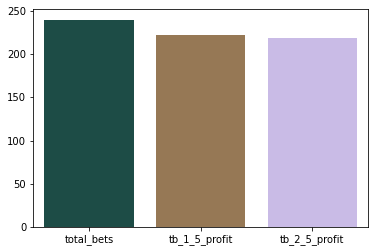

In [8]:
chart_data = pd.Series({'total_bets':total_bets, 'tb_1_5_profit':tb_1_5_profit, 'tb_2_5_profit':tb_2_5_profit})
chart_data

sb.barplot(x=chart_data.index,
           y=chart_data,
           palette = 'cubehelix')

### 2.3. Выводы

In [9]:
tb_1_5_total_profit = tb_1_5_profit - total_bets
tb_2_5_total_profit = tb_2_5_profit - total_bets

tb_1_5_total_profit_percentage = tb_1_5_total_profit / total_bets
tb_2_5_total_profit_percentage = tb_2_5_total_profit / total_bets

print(f'''Если бы вы поставили ставку "ТБ > 1.5" по 1 руб. на все матчи РПЛ сезона 2021/22:
Средний коэффициент ставок был бы равен {coeff_1_5_avg:.4}.
При этом ваш доход составил бы {tb_1_5_total_profit:.4}руб. или {tb_1_5_total_profit_percentage:.2%}!''')
print()
print(f'''Если бы вы поставили ставку "ТБ > 2.5" по 1 руб. со средним коэффициентом {coeff_2_5_avg:.4}:
Ваш доход составил бы {tb_2_5_total_profit:.4}руб. или {tb_2_5_total_profit_percentage:.2%}!''')

Если бы вы поставили ставку "ТБ > 1.5" по 1 руб. на все матчи РПЛ сезона 2021/22:
Средний коэффициент ставок был бы равен 1.249.
При этом ваш доход составил бы -17.62руб. или -7.34%!

Если бы вы поставили ставку "ТБ > 2.5" по 1 руб. со средним коэффициентом 1.797:
Ваш доход составил бы -20.77руб. или -8.65%!


## 3. Поиск выгодных ставок

### 3.1. Самые забивающие и пропускающие команды

Для того, чтобы ставка на тотал "сыграла", неважно, команда много забьет или пропустит.  
Поэтому по каждой команде исследуются данные столбца `total_score`.

In [154]:
all_teams_data = []

for team in df['host_team'].unique():
    
    all_host_games = df[df['host_team'] ==  team]
    all_away_games = df[df['away_team'] ==  team]
    all_team_games = pd.concat([all_host_games, all_away_games])
    
    total_team_score = all_team_games['total_score'].sum()
    team_data = [team, total_team_score]
    all_teams_data.append(team_data)

all_teams_data = pd.DataFrame(all_teams_data, columns=['team', 'total_score']).sort_values(by='total_score', ascending = False).reset_index(drop = True)

all_teams_data

,team,total_score
0,Ростов,98
1,Зенит,94
2,Динамо М,94
3,Рубин,90
4,Арсенал,89
5,Сочи,84
6,Локомотив М,82
7,Химки,81
8,Спартак М,78
9,Крылья Советов,75


Как видно, самые "голевые" (то есть забивающие или пропускающие) команды - это:
1. `Ростов`
2. `Зенит`
3. `Динамо`
4. `Рубин`
5. `Арсенал`